In [7]:
%matplotlib inline

import google
import urllib.request

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]

In [8]:
from socket import timeout
from urllib.error import HTTPError, URLError

def download_pdf(pdf_url):
    filename = pdf_url.split('/')[-1]
    try:
        pdf_file = urllib.request.urlopen(pdf_url)
    except (HTTPError, URLError, timeout):
        return
    with open('pdfs/' + filename, 'wb') as file:
        file.write(pdf_file.read())

In [15]:
keyword = 'cat filetype:pdf'

for url in google.search(keyword, num=200, stop=1):
    try:
        download_pdf(url)
    except:
        continue

In [32]:
from PyPDF2 import PdfFileReader
import os

pdf_page_numbers = list()
author_included = list()
authors = list()

pdf_directory = './pdfs/'

for pdf_file in os.listdir(pdf_directory):
    try:
        pdf_reader = PdfFileReader(open(pdf_directory + pdf_file, 'rb'))
        pdf_page_numbers.append(pdf_reader.getNumPages())
        author_included.append(pdf_reader.documentInfo.author is not None)
        if pdf_reader.documentInfo.author is not None:
            authors.append(pdf_reader.documentInfo.author)
    except:
        continue

In [29]:
len(author_included)

83

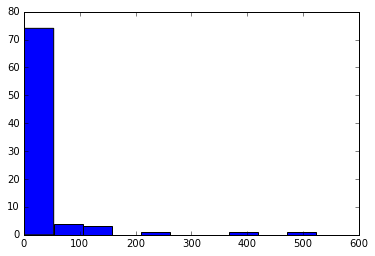

In [30]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(pdf_page_numbers)
plt.hist(y);
plt.show()

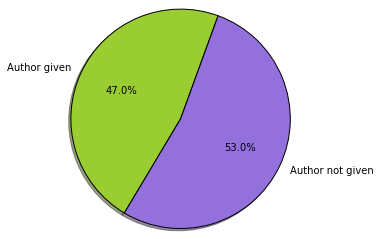

In [31]:
labels = 'Author given', 'Author not given'
sizes = [sum(author_included) / len(author_included), 1 - sum(author_included) / len(author_included)]
colors = ['yellowgreen', 'mediumpurple']

plt.pie(sizes,  
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=70
        )

plt.axis('equal')
plt.show()

In [33]:
authors

['Office of Parliamentary Counsel',
 'Corigan #1',
 'Christoph Schubert',
 'BENTEJAC CHRISTOPHE',
 'Edgar Allan Poe',
 'Ron Eichholtz',
 'P',
 'Heike Pahlow',
 'Corvalan Bounkham',
 'Amadeu',
 'Morgan, Frank',
 'Daniel Caturana, David Furry',
 'wb76423',
 'LEMO SA, info@lemo.com',
 'The Department of Health and Human Services',
 'lfink',
 'Jonathan Sterne',
 'evaan',
 'willy.sigl@easa.europa.eu',
 'Karen',
 'Gerald L. Bruns',
 'eguise',
 '',
 'Juliana',
 'Brenda Griffin',
 'mjbain',
 'cbuffing',
 'Preferred Customer',
 'Marc Prior',
 'Defra',
 'John Ranson',
 'BThalman',
 'PTSGI',
 'Michelle',
 '',
 'SN',
 'HFV-110',
 'IIDA',
 'Jim']

In [34]:
from collections import Counter

print(Counter(authors))

Counter({'': 2, 'Michelle': 1, 'Amadeu': 1, 'Gerald L. Bruns': 1, 'mjbain': 1, 'The Department of Health and Human Services': 1, 'Morgan, Frank': 1, 'BENTEJAC CHRISTOPHE': 1, 'SN': 1, 'Edgar Allan Poe': 1, 'Corigan #1': 1, 'Heike Pahlow': 1, 'willy.sigl@easa.europa.eu': 1, 'Juliana': 1, 'LEMO SA, info@lemo.com': 1, 'eguise': 1, 'cbuffing': 1, 'Jim': 1, 'BThalman': 1, 'Office of Parliamentary Counsel': 1, 'John Ranson': 1, 'PTSGI': 1, 'wb76423': 1, 'P': 1, 'evaan': 1, 'lfink': 1, 'Christoph Schubert': 1, 'Karen': 1, 'Corvalan Bounkham': 1, 'IIDA': 1, 'Preferred Customer': 1, 'Daniel Caturana, David Furry': 1, 'Ron Eichholtz': 1, 'Marc Prior': 1, 'Defra': 1, 'Jonathan Sterne': 1, 'HFV-110': 1, 'Brenda Griffin': 1})
